In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import logging

In [5]:
logging.basicConfig(level = logging.DEBUG)

logger = logging.getLogger(__name__)

filehandler = logging.FileHandler('STOCK_PREDICTION.log')
streamhandler = logging.StreamHandler()

formater = logging.Formatter('%(asctime)-15s %(user)-8s %(message)s')

filehandler.setFormatter(formater)
streamhandler.setFormatter(formater)

logger.addHandler(filehandler)
logger.addHandler(streamhandler)

In [16]:
init_data = pd.read_csv("GOOG.csv")
print(init_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 7 columns):
Date         3834 non-null object
Open         3834 non-null float64
High         3834 non-null float64
Low          3834 non-null float64
Close        3834 non-null float64
Adj Close    3834 non-null float64
Volume       3834 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 209.8+ KB
None


In [17]:
data = init_data.drop(["Adj Close"], axis=1).copy()
print(data.head(10))

         Date       Open       High        Low      Close    Volume
0  2004-08-19  49.813286  51.835709  47.800831  49.982655  44871300
1  2004-08-20  50.316402  54.336334  50.062355  53.952770  22942800
2  2004-08-23  55.168217  56.528118  54.321388  54.495735  18342800
3  2004-08-24  55.412300  55.591629  51.591621  52.239193  15319700
4  2004-08-25  52.284027  53.798351  51.746044  52.802086   9232100
5  2004-08-26  52.279045  53.773445  52.134586  53.753517   7128600
6  2004-08-27  53.848164  54.107193  52.647663  52.876804   6241200
7  2004-08-30  52.443428  52.548038  50.814533  50.814533   5221400
8  2004-08-31  50.958992  51.661362  50.889256  50.993862   4941200
9  2004-09-01  51.158245  51.292744  49.648903  49.937820   9181600


In [18]:
data["Date"] = pd.to_datetime(data["Date"])

In [19]:
data.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

# VISUALIZATION

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>)

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal bold normal>) = 4.971363636363637
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Leelawadee UI' (LeelUIsl.ttf) normal normal light normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (arial.ttf) normal normal 400 normal>) = 6.413636363636363
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Malgun Gothic' (malgun.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal light normal>) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'SimSun-ExtB' (simsunb.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Pal

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Corbel' (corbell.ttf) normal normal light normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Leelawadee UI' (LeelawUI.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Calibri' (calibrib.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Courier New' (courbd.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Constantia' (constanb.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Courier New' (courbi.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Candara' (Candarab.ttf) norma

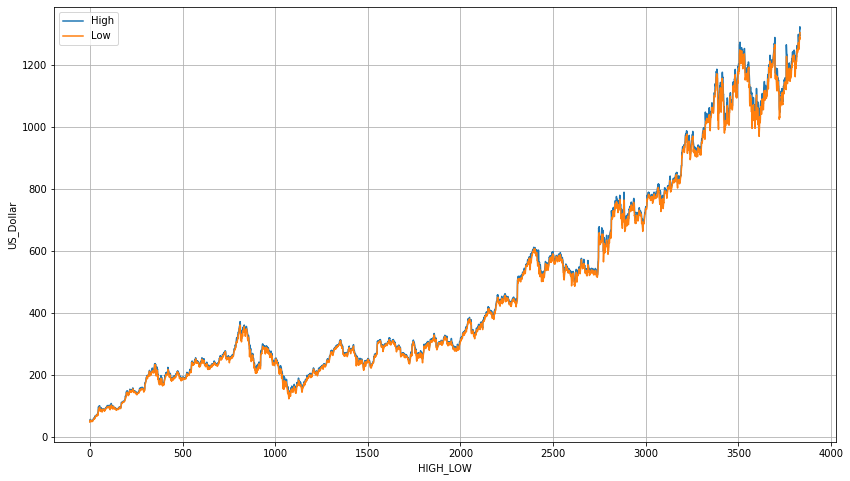

In [20]:
plt.figure(figsize=(14, 8))
plt.plot('High', data=init_data)
plt.plot('Low', data=init_data,)
plt.xlabel("HIGH_LOW")
plt.ylabel("US_Dollar")
plt.legend()
plt.grid(which='both')

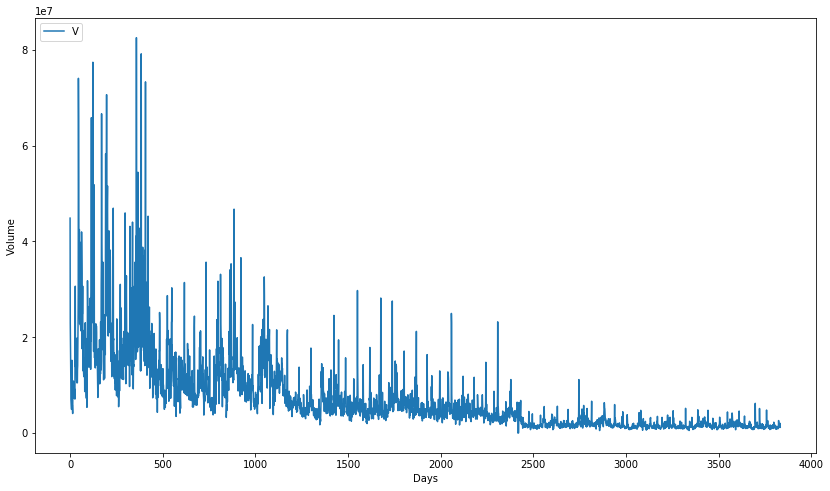

In [21]:
plt.figure(figsize=(14,8))
plt.plot(data["Volume"])
plt.ylabel("Volume")
plt.xlabel("Days")
plt.legend("V",loc="upper left")

In [50]:
params = {"time_steps":90, "batch_size":30, "learning_rate":0.01, "epochs":10}
y_col = 3
OUTPUT_PATH = "C:\\Users\\varun\\Documents\\Projects\\Stock-Market-Prediction"

In [23]:
def dataseries(mat, y_col, time_stamp):
    
    dim0 = mat.shape[0] - time_stamp
    dim1 = mat.shape[1]
    
    x = np.zeros((dim0,time_stamp,dim1))
    y = np.zeros((dim0))
     
    for itr in range(dim0):
        x[itr] = mat[itr:time_stamp+itr]
        y[itr] = mat[time_stamp, y_col]
        
    return x,y

In [24]:
def trimseries(mat, batch):
    
    no_of_row_remined = mat.shape[0]%batch
    
    if no_of_row_remined != 0 :
        mat = mat[:-no_of_row_remined]
        
    return mat

In [25]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split

In [26]:
    train_cols = data.columns[1:]
    print(train_cols)

    min_max = MinMaxScaler()
    norm_data = min_max.fit_transform(data[train_cols])
    
    X_train, X_test = train_test_split(norm_data, test_size=0.2, train_size=0.8, shuffle=False)
    
    x_t, y_t = dataseries(X_train, y_col, params["time_steps"])
    x_t = trimseries(x_t, params["batch_size"])
    y_t = trimseries(y_t, params["batch_size"])
    x_test, y_test = dataseries(X_test, y_col, params["time_steps"])
    x_val, x_test_t  = np.split(trimseries(x_test, params["batch_size"]),2)
    y_val, y_test_t  = np.split(trimseries(y_test, params["batch_size"]),2)

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [27]:
import tensorflow as tf
import tensorflow.keras as k
import os
import sys
sys.executable

'c:\\program files\\python37\\python.exe'

In [28]:
#model.reset_states()

In [38]:
from tensorflow.keras.callbacks import Callback

In [29]:
#x_t.shape[2]

In [39]:
def Model(params):
    
    model = k.models.Sequential()
    
    model.add(k.layers.LSTM(128, batch_input_shape=(params["batch_size"], params["time_steps"], 5), dropout=0.0, recurrent_dropout=0.0, stateful=True,     kernel_initializer='random_uniform'))
    model.add(k.layers.Dropout(0.2))
    model.add(k.layers.Dense(32,activation='relu'))
    model.add(k.layers.Dense(1,activation='sigmoid'))
    
    optimizer = k.optimizers.RMSprop(learning_rate=params['learning_rate'], momentum=0.3)
    
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    
    return model

In [48]:
def fit_model(model, OUTPUT_PATH, X_val, y_val, params):
    
    csv_logger = k.callbacks.CSVLogger(os.path.join(OUTPUT_PATH, 'STOCK_PREDICTION' + '.log'), append=True)
    
    history = model.fit(x_t, y_t, epochs=params["epochs"], verbose=2, batch_size=params["batch_size"],
                    shuffle=False, validation_data=(trimseries(x_val, params["batch_size"]),
                    trimseries(y_val, params["batch_size"])),callbacks=[csv_logger])
    return history

In [66]:
def predict(x_test, y_test, batch_size):
    
    y_pred = model.predict(trimseries(x_test, batch_size),batch_size=batch_size)
    y_pred  = y_pred.flatten()
    y_test_t = trimseries(y_test, batch_size)
    erorr = k.metrics.mean_squared_error(y_test_t,y_pred)
    
    y_pred, y_test = to_original(y_pred, y_test_t, min_max)
    
    plt.figure(figsize=(12,8))
    plt.plot(y_pred)
    plt.plot(y_test_t)
    
    return erorr, y_pred

In [42]:
def to_original(y_pred, y_test, min_max):
    
    y_pred_org = (y_pred * min_max.data_range_[3]) + min_max.data_min_[3]
    y_test_org = (y_test_t * min_max.data_range_[3]) + min_max.data_min_[3]
    
    return y_pred_org, y_test_org

In [43]:
def plot_diff(history):
    
    ax = plt.figure(figsize=(12,8))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel("loss")
    plt.ylabel("Val_loss")
    #plt.legend(labels)
    print(ax)
    pass

# GRID SEARCH

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = dict(epochs = [10, 20, 30], batch_size = [20, 60, 90], learning_rate = [0.1, 0.01, 0.001], time_steps = [60, 90, 30])

model_grid = k.wrappers.scikit_learn.KerasRegressor(build_fn=Model(params))

grid = GridSearchCV(estimator=model_grid, param_grid=parameters,cv=3)

grid_result = grid.fit(x_t, y_t)


# BAYESIEN OPTIMIZATION

In [ ]:
from hyperopt import Trials, STATUS_OK, tpe, fmin, hp

def Data(data, params):
    
    train_cols = data.columns[1:]
    print(train_cols)

    min_max = MinMaxScaler()
    norm_data = min_max.fit_transform(data[train_cols])
    
    X_train, X_test = train_test_split(norm_data, test_size=0.2, train_size=0.8, shuffle=False)
    
    x_t, y_t = dataseries(X_train, y_col, params["time_steps"])
    x_t = trimseries(x_t, params["batch_size"])
    y_t = trimseries(y_t, params["batch_size"])
    x_test, y_test = dataseries(X_test, y_col, params["time_steps"])
    x_test  = trimseries(x_test, params["batch_size"])
    y_test  = trimseries(y_test, params["batch_size"])
    
    return x_t, y_t, x_test, y_test



search_space = {
    'batch_size': hp.choice('bs', [30,40,50,60,70]),
    'time_steps': hp.choice('ts', [30,50,60,80,90]),
    "lr": hp.uniform('lr',0,1),
    "epochs": hp.choice('epochs', [30, 40, 50, 60, 70]),
    "optimizer": hp.choice('optmz',["sgd", "rms"])}



def create_model_hypopt(params):
    print("Trying params:",params)
    
    batch_size = params["batch_size"]
    time_steps = params["time_steps"]
    
    
    x_train_ts, y_train_ts, x_test_ts, y_test_ts = Data(data, params)
    lstm_model = k.models.Sequential()
    
    lstm_model.add(k.layers.LSTM(100, batch_input_shape=(batch_size, time_steps, x_train_ts.shape[2]), dropout=0,
                        recurrent_dropout=0, stateful=True, return_sequences=True,
                        kernel_initializer='random_uniform'))  
    lstm_model.add(k.layers.LSTM(32, dropout=0.4))
    lstm_model.add(k.layers.Dense(8, activation='relu'))
    lstm_model.add(k.layers.Dense(1, activation='sigmoid'))

    lr = params["lr"]
    epochs = params["epochs"]
    
    if params["optimizer"] == 'rms':
        optimizer = k.optimizers.RMSprop(lr=lr)
    else:
        optimizer = k.optimizers.SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)

    lstm_model.compile(loss='mean_squared_error', optimizer=optimizer)
    
    history = lstm_model.fit(x_train_ts, y_train_ts, epochs=epochs, verbose=2, batch_size=batch_size,
                             validation_data=[x_test_ts, y_test_ts])
    
    val_error = np.amin(history.history['val_loss'])
    
    print('Best validation error of epoch:', val_error)
    
    return {'loss': val_error, 'status': STATUS_OK, 'model': lstm_model}
    

    
trials = Trials()

best = fmin(create_model_hypopt, space=search_space,algo=tpe.suggest,max_evals=20, trials=trials)


# REGULAR

In [44]:
model = Model(params)

In [51]:
history = fit_model(model, OUTPUT_PATH, x_val, y_val, params)

Train on 2970 samples, validate on 330 samples
Epoch 1/10
2970/2970 - 18s - loss: 0.0043 - val_loss: 0.3803
Epoch 2/10
2970/2970 - 13s - loss: 0.0013 - val_loss: 0.3803
Epoch 3/10
2970/2970 - 13s - loss: 0.0013 - val_loss: 0.3803
Epoch 4/10
2970/2970 - 13s - loss: 0.0013 - val_loss: 0.3803
Epoch 5/10
2970/2970 - 13s - loss: 0.0013 - val_loss: 0.3803
Epoch 6/10
2970/2970 - 13s - loss: 0.0013 - val_loss: 0.3803
Epoch 7/10
2970/2970 - 13s - loss: 0.0013 - val_loss: 0.3803
Epoch 8/10
2970/2970 - 13s - loss: 0.0013 - val_loss: 0.3803
Epoch 9/10
2970/2970 - 13s - loss: 0.0013 - val_loss: 0.3803
Epoch 10/10
2970/2970 - 13s - loss: 0.0013 - val_loss: 0.3803


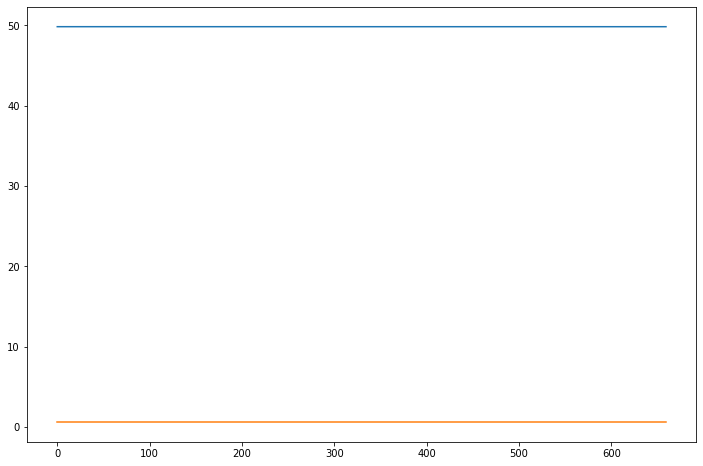

In [67]:
erorr, y_pred = predict(x_test, y_test, params['batch_size'])

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(y_pred_org)
plt.plot(y_test_org)